### Aggressive Portfolio Test

In [39]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_LR import PortfolioSimulator

# List of assets to fetch data for
asset_list = ['COST', 'LLY', 'META', 'MRK', 'NVDA', '^TNX', '^TYX', 'WELL', 'O', 'CCI']

# Define the start and end dates for fetching the data (2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Calculate historical annual returns
historical_returns = {}
for asset in asset_list:
    close_prices = all_assets_df[asset]['close']
    daily_returns = close_prices.pct_change().dropna()
    avg_daily_return = daily_returns.mean()
    annual_return = ((1 + avg_daily_return) ** 252 - 1) * 100  # Convert to percentage
    historical_returns[asset] = annual_return

print("Historical Annual Returns:", historical_returns)

Fetching data for COST...
Fetching data for LLY...
Fetching data for META...
Fetching data for MRK...
Fetching data for NVDA...
Fetching data for ^TNX...
Fetching data for ^TYX...
Fetching data for WELL...
Fetching data for O...
Fetching data for CCI...


COST                                                  \
                  open        high         low       close   adj close   
2022-06-09  467.339996  484.239990  467.149994  472.049988  455.071350   
2022-06-10  465.000000  468.190002  457.760010  463.309998  446.645691   
2022-06-13  450.000000  458.640015  448.899994  452.250000  435.983551   
2022-06-14  452.250000  458.760010  450.279999  454.799988  438.441833   
2022-06-15  458.500000  464.359985  451.390015  458.790009  442.288269   
...                ...         ...         ...         ...         ...   
2024-06-03  811.000000  827.909973  807.130005  815.390015  815.390015   
2024-06-04  814.979980  828.010010  813.039978  827.390015  827.390015   
2024-06-05  830.909973  834.390015  821.679993  834.299988  834.299988   
2024-06-06  835.419983  849.090027  834.320007  842.640015  842.640015   
2024-06-07  846.679993  850.380005  842.289978  845.580017  845.580017   

                                     LLY                          ...  \
               volume ticker        open        high         low  ...   
2022-06-09  3087500.0   COST  311.600006  311.920013  303.109985  ...   
2022-06-10  2549900.0   COST  299.230011  301.660004  296.869995  ...   
2022-06-13  3113400.0   COST  290.429993  293.160004  288.510010  ...   
2022-06-14  2224600.0   COST  289.170013  292.000000  287.290009  ...   
2022-06-15  2250200.0   COST  291.600006  296.339996  288.529999  ...   
...               ...    ...         ...         ...         ...  ...   
2024-06-03  2008700.0   COST  823.830017  838.280029  818.500000  ...   
2024-06-04  1754500.0   COST  834.000000  835.469971  825.309998  ...   
2024-06-05  2080000.0   COST  830.489990  838.450012  817.619995  ...   
2024-06-06  1735000.0   COST  834.880005  846.969971  831.880005  ...   
2024-06-07  1593200.0   COST  837.760010  856.809998  837.010010  ...   

                    O                           CCI                          \
            adj close     volume ticker        open        high         low   
2022-06-09  59.740974  4325300.0      O  183.500000  185.830002  179.369995   
2022-06-10  59.452549  4513600.0      O  177.080002  177.610001  172.520004   
2022-06-13  56.973846  5406100.0      O  169.160004  171.699997  165.250000   
2022-06-14  56.595291  4541300.0      O  164.500000  165.110001  157.190002   
2022-06-15  58.406994  4884500.0      O  160.350006  163.100006  157.800003   
...               ...        ...    ...         ...         ...         ...   
2024-06-03  53.310001  4398700.0      O  102.989998  104.010002  102.449997   
2024-06-04  54.430000  5815900.0      O  103.019997  104.230003  102.410004   
2024-06-05  54.029999  4729300.0      O  103.260002  103.959999  102.160004   
2024-06-06  54.259998  3350700.0      O  101.870003  102.320000  101.279999   
2024-06-07  53.320000  3962700.0      O  100.000000  101.000000   99.260002   

                                                      
                 close   adj close     volume ticker  
2022-06-09  179.630005  162.834045  1381400.0    CCI  
2022-06-10  172.649994  156.506699  1879100.0    CCI  
2022-06-13  166.039993  150.514740  1733800.0    CCI  
2022-06-14  157.919998  144.432709  3224600.0    CCI  
2022-06-15  160.250000  146.563705  2949700.0    CCI  
...                ...         ...        ...    ...  
2024-06-03  103.110001  103.110001  2891900.0    CCI  
2024-06-04  103.620003  103.620003  2213300.0    CCI  
2024-06-05  102.379997  102.379997  1961100.0    CCI  
2024-06-06  101.639999  101.639999  1940300.0    CCI  
2024-06-07  100.620003  100.620003  2324800.0    CCI  

[502 rows x 70 columns]

Historical Annual Returns: {'COST': 37.31889294813335, 'LLY': 74.40970745710072, 'META': 83.99196645111888, 'MRK': 24.219193161521368, 'NVDA': 197.96939965679496, '^TNX': 27.06442460676808, '^TYX': 23.808435700953588, 'WELL': 15.411501125384476, 'O': -8.488928876478885, 'CCI': -22.261877427706843}


COST                                                  \
                  open        high         low       close   adj close   
2022-06-09  467.339996  484.239990  467.149994  472.049988  455.071350   
2022-06-10  465.000000  468.190002  457.760010  463.309998  446.645691   
2022-06-13  450.000000  458.640015  448.899994  452.250000  435.983551   
2022-06-14  452.250000  458.760010  450.279999  454.799988  438.441833   
2022-06-15  458.500000  464.359985  451.390015  458.790009  442.288269   
...                ...         ...         ...         ...         ...   
2024-06-03  811.000000  827.909973  807.130005  815.390015  815.390015   
2024-06-04  814.979980  828.010010  813.039978  827.390015  827.390015   
2024-06-05  830.909973  834.390015  821.679993  834.299988  834.299988   
2024-06-06  835.419983  849.090027  834.320007  842.640015  842.640015   
2024-06-07  846.679993  850.380005  842.289978  845.580017  845.580017   

                                                LLY              ...      O  \
               volume ticker log_return        open        high  ... ticker   
2022-06-09  3087500.0   COST        NaN  311.600006  311.920013  ...      O   
2022-06-10  2549900.0   COST  -0.018689  299.230011  301.660004  ...      O   
2022-06-13  3113400.0   COST  -0.024161  290.429993  293.160004  ...      O   
2022-06-14  2224600.0   COST   0.005623  289.170013  292.000000  ...      O   
2022-06-15  2250200.0   COST   0.008735  291.600006  296.339996  ...      O   
...               ...    ...        ...         ...         ...  ...    ...   
2024-06-03  2008700.0   COST   0.006768  823.830017  838.280029  ...      O   
2024-06-04  1754500.0   COST   0.014610  834.000000  835.469971  ...      O   
2024-06-05  2080000.0   COST   0.008317  830.489990  838.450012  ...      O   
2024-06-06  1735000.0   COST   0.009947  834.880005  846.969971  ...      O   
2024-06-07  1593200.0   COST   0.003483  837.760010  856.809998  ...      O   

                              CCI                                      \
           log_return        open        high         low       close   
2022-06-09        NaN  183.500000  185.830002  179.369995  179.630005   
2022-06-10  -0.004840  177.080002  177.610001  172.520004  172.649994   
2022-06-13  -0.035551  169.160004  171.699997  165.250000  166.039993   
2022-06-14  -0.006667  164.500000  165.110001  157.190002  157.919998   
2022-06-15   0.031510  160.350006  163.100006  157.800003  160.250000   
...               ...         ...         ...         ...         ...   
2024-06-03   0.004701  102.989998  104.010002  102.449997  103.110001   
2024-06-04   0.020792  103.019997  104.230003  102.410004  103.620003   
2024-06-05  -0.007376  103.260002  103.959999  102.160004  102.379997   
2024-06-06   0.004248  101.870003  102.320000  101.279999  101.639999   
2024-06-07  -0.017476  100.000000  101.000000   99.260002  100.620003   

                                                     
             adj close     volume ticker log_return  
2022-06-09  162.834045  1381400.0    CCI        NaN  
2022-06-10  156.506699  1879100.0    CCI  -0.039633  
2022-06-13  150.514740  1733800.0    CCI  -0.039038  
2022-06-14  144.432709  3224600.0    CCI  -0.050140  
2022-06-15  146.563705  2949700.0    CCI   0.014647  
...                ...        ...    ...        ...  
2024-06-03  103.110001  2891900.0    CCI   0.005934  
2024-06-04  103.620003  2213300.0    CCI   0.004934  
2024-06-05  102.379997  1961100.0    CCI  -0.012039  
2024-06-06  101.639999  1940300.0    CCI  -0.007254  
2024-06-07  100.620003  2324800.0    CCI  -0.010086  

[502 rows x 80 columns]

array([ 0.00125848,  0.00220729,  0.00241953,  0.00086063,  0.00433262,
        0.00095049,  0.00084748,  0.00056879, -0.00035202, -0.0009993 ])

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:97: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count            500.000000
mean            2338.628967
std             1231.138092
min              417.702621
25%             1471.642616
50%             2040.170559
75%             2980.069094
max             8350.221516
95% CI Lower     719.817849
95% CI Upper    5500.691692
Name: 3780, dtype: float64


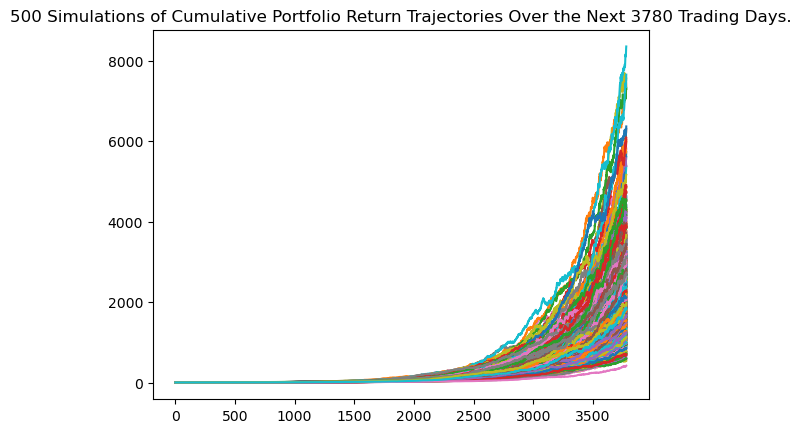

In [40]:
# Define weights and historical returns

weights = [0.1, 0.2, 0.02, 0.2, 0.2, 0.08, 0.17, 0.01, 0.01, 0.01]

# historical_returns = {
#     "ABBV": 12.13, "AMZN": 29.18, "COST": 20.57, "CVX": 2.51, "HD": 16.11,
#     "JNJ": 4.04, "LLY": 28.60, "MRK": 9.32, "PG": 7.19, "UNH": 20.42,
#     "V": 17.69, "^TNX": 5.63, "^TYX": 3.16, "WELL": 4.07, "O": 2.63, "CCI": 2.35
# }

# Initialize the PortfolioSimulator
sim_returns2 = PortfolioSimulator(
    portfolio_data=all_assets_df,
    annual_returns=historical_returns,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*15  # Simulate for 2 years (approx. 252 trading days per year)
)

# Display the first few rows of the portfolio data
display(sim_returns2.portfolio_data)
display(sim_returns2.daily_log_returns)

# Run the simulation
cumulative_returns = sim_returns2.calc_cumulative_return()

# Plot the simulation results
sim_returns2.plot_simulation()

# # Plot the distribution of final cumulative returns
# sim_returns2.plot_distribution()

# Summarize the cumulative return statistics
summary = sim_returns2.summarize_cumulative_return()
print(summary)

<AxesSubplot:title={'center':'Distribution of Final Cumulative Returns Across All Simulations'}, ylabel='Frequency'>

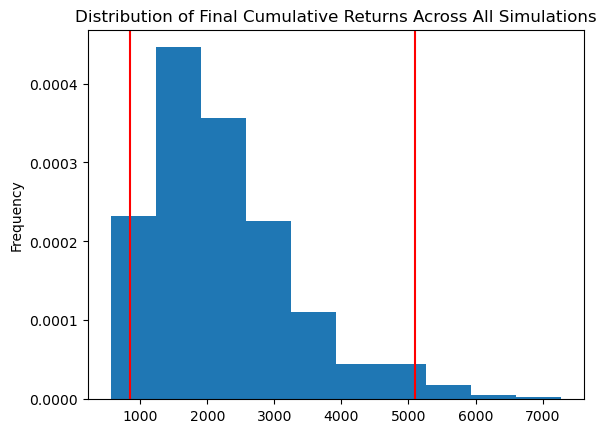

In [16]:
sim_returns2.plot_distribution()

In [17]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * summary[9],2) 
port_low_return = round(initial_investment * summary[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $84614254.19 and $509675289.53


In [18]:
initial_investment = 100000
lower_estimate = 84614254.19 
upper_estimate = 509675289.53

years = 15

lower_annual_return = (lower_estimate / initial_investment) ** (1 / years) - 1
upper_annual_return = (upper_estimate / initial_investment) ** (1 / years) - 1

print(f"Lower Implied Annual Return: {lower_annual_return * 100:.2f}%")
print(f"Upper Implied Annual Return: {upper_annual_return * 100:.2f}%")

Lower Implied Annual Return: 56.73%
Upper Implied Annual Return: 76.67%


### Moderate Portfolio Test

In [19]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_LR import PortfolioSimulator

# List of assets to fetch data for
asset_list = ['COST', 'JPM', 'LLY', 'META', 'MRK', 'NVDA', 'PG', 'XOM', '^TNX', '^TYX', 'WELL', 'O', 'CCI']

# Define the start and end dates for fetching the data (2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Calculate historical annual returns
historical_returns = {}
for asset in asset_list:
    close_prices = all_assets_df[asset]['close']
    daily_returns = close_prices.pct_change().dropna()
    avg_daily_return = daily_returns.mean()
    annual_return = ((1 + avg_daily_return) ** 252 - 1) * 100  # Convert to percentage
    historical_returns[asset] = annual_return

print("Historical Annual Returns:", historical_returns)

Fetching data for COST...
Fetching data for JPM...
Fetching data for LLY...
Fetching data for META...
Fetching data for MRK...
Fetching data for NVDA...
Fetching data for PG...
Fetching data for XOM...
Fetching data for ^TNX...
Fetching data for ^TYX...
Fetching data for WELL...
Fetching data for O...
Fetching data for CCI...


COST                                                  \
                  open        high         low       close   adj close   
2022-06-09  467.339996  484.239990  467.149994  472.049988  455.071381   
2022-06-10  465.000000  468.190002  457.760010  463.309998  446.645721   
2022-06-13  450.000000  458.640015  448.899994  452.250000  435.983551   
2022-06-14  452.250000  458.760010  450.279999  454.799988  438.441803   
2022-06-15  458.500000  464.359985  451.390015  458.790009  442.288300   
...                ...         ...         ...         ...         ...   
2024-06-03  811.000000  827.909973  807.130005  815.390015  815.390015   
2024-06-04  814.979980  828.010010  813.039978  827.390015  827.390015   
2024-06-05  830.909973  834.390015  821.679993  834.299988  834.299988   
2024-06-06  835.419983  849.090027  834.320007  842.640015  842.640015   
2024-06-07  846.679993  850.380005  842.289978  845.580017  845.580017   

                                     JPM                          ...  \
               volume ticker        open        high         low  ...   
2022-06-09  3087500.0   COST  127.370003  128.100006  125.269997  ...   
2022-06-10  2549900.0   COST  122.589996  123.400002  119.320000  ...   
2022-06-13  3113400.0   COST  116.860001  117.949997  115.059998  ...   
2022-06-14  2224600.0   COST  115.550003  117.320000  113.220001  ...   
2022-06-15  2250200.0   COST  115.620003  116.949997  113.169998  ...   
...               ...    ...         ...         ...         ...  ...   
2024-06-03  2008700.0   COST  202.309998  202.419998  199.190002  ...   
2024-06-04  1754500.0   COST  200.160004  201.979996  198.279999  ...   
2024-06-05  2080000.0   COST  199.759995  199.820007  196.919998  ...   
2024-06-06  1735000.0   COST  197.259995  198.020004  195.330002  ...   
2024-06-07  1593200.0   COST  197.429993  200.919998  197.009995  ...   

                    O                           CCI                          \
            adj close     volume ticker        open        high         low   
2022-06-09  59.740974  4325300.0      O  183.500000  185.830002  179.369995   
2022-06-10  59.452541  4513600.0      O  177.080002  177.610001  172.520004   
2022-06-13  56.973854  5406100.0      O  169.160004  171.699997  165.250000   
2022-06-14  56.595287  4541300.0      O  164.500000  165.110001  157.190002   
2022-06-15  58.406994  4884500.0      O  160.350006  163.100006  157.800003   
...               ...        ...    ...         ...         ...         ...   
2024-06-03  53.310001  4398700.0      O  102.989998  104.010002  102.449997   
2024-06-04  54.430000  5815900.0      O  103.019997  104.230003  102.410004   
2024-06-05  54.029999  4729300.0      O  103.260002  103.959999  102.160004   
2024-06-06  54.259998  3350700.0      O  101.870003  102.320000  101.279999   
2024-06-07  53.320000  3962700.0      O  100.000000  101.000000   99.260002   

                                                      
                 close   adj close     volume ticker  
2022-06-09  179.630005  162.834061  1381400.0    CCI  
2022-06-10  172.649994  156.506699  1879100.0    CCI  
2022-06-13  166.039993  150.514725  1733800.0    CCI  
2022-06-14  157.919998  144.432678  3224600.0    CCI  
2022-06-15  160.250000  146.563690  2949700.0    CCI  
...                ...         ...        ...    ...  
2024-06-03  103.110001  103.110001  2891900.0    CCI  
2024-06-04  103.620003  103.620003  2213300.0    CCI  
2024-06-05  102.379997  102.379997  1961100.0    CCI  
2024-06-06  101.639999  101.639999  1940300.0    CCI  
2024-06-07  100.620003  100.620003  2324800.0    CCI  

[502 rows x 91 columns]

Historical Annual Returns: {'COST': 37.31889294813335, 'JPM': 29.833207077119273, 'LLY': 74.40970745710072, 'META': 83.99196645111888, 'MRK': 24.219193161521368, 'NVDA': 197.96939965679496, 'PG': 9.82477355234197, 'XOM': 8.92101379511896, '^TNX': 27.06442460676808, '^TYX': 23.808435700953588, 'WELL': 15.411501125384476, 'O': -8.488928876478885, 'CCI': -22.261877427706843}


COST                                                  \
                  open        high         low       close   adj close   
2022-06-09  467.339996  484.239990  467.149994  472.049988  455.071381   
2022-06-10  465.000000  468.190002  457.760010  463.309998  446.645721   
2022-06-13  450.000000  458.640015  448.899994  452.250000  435.983551   
2022-06-14  452.250000  458.760010  450.279999  454.799988  438.441803   
2022-06-15  458.500000  464.359985  451.390015  458.790009  442.288300   
...                ...         ...         ...         ...         ...   
2024-06-03  811.000000  827.909973  807.130005  815.390015  815.390015   
2024-06-04  814.979980  828.010010  813.039978  827.390015  827.390015   
2024-06-05  830.909973  834.390015  821.679993  834.299988  834.299988   
2024-06-06  835.419983  849.090027  834.320007  842.640015  842.640015   
2024-06-07  846.679993  850.380005  842.289978  845.580017  845.580017   

                                                JPM              ...      O  \
               volume ticker log_return        open        high  ... ticker   
2022-06-09  3087500.0   COST        NaN  127.370003  128.100006  ...      O   
2022-06-10  2549900.0   COST  -0.018689  122.589996  123.400002  ...      O   
2022-06-13  3113400.0   COST  -0.024161  116.860001  117.949997  ...      O   
2022-06-14  2224600.0   COST   0.005623  115.550003  117.320000  ...      O   
2022-06-15  2250200.0   COST   0.008735  115.620003  116.949997  ...      O   
...               ...    ...        ...         ...         ...  ...    ...   
2024-06-03  2008700.0   COST   0.006768  202.309998  202.419998  ...      O   
2024-06-04  1754500.0   COST   0.014610  200.160004  201.979996  ...      O   
2024-06-05  2080000.0   COST   0.008317  199.759995  199.820007  ...      O   
2024-06-06  1735000.0   COST   0.009947  197.259995  198.020004  ...      O   
2024-06-07  1593200.0   COST   0.003483  197.429993  200.919998  ...      O   

                              CCI                                      \
           log_return        open        high         low       close   
2022-06-09        NaN  183.500000  185.830002  179.369995  179.630005   
2022-06-10  -0.004840  177.080002  177.610001  172.520004  172.649994   
2022-06-13  -0.035551  169.160004  171.699997  165.250000  166.039993   
2022-06-14  -0.006667  164.500000  165.110001  157.190002  157.919998   
2022-06-15   0.031510  160.350006  163.100006  157.800003  160.250000   
...               ...         ...         ...         ...         ...   
2024-06-03   0.004701  102.989998  104.010002  102.449997  103.110001   
2024-06-04   0.020792  103.019997  104.230003  102.410004  103.620003   
2024-06-05  -0.007376  103.260002  103.959999  102.160004  102.379997   
2024-06-06   0.004248  101.870003  102.320000  101.279999  101.639999   
2024-06-07  -0.017476  100.000000  101.000000   99.260002  100.620003   

                                                     
             adj close     volume ticker log_return  
2022-06-09  162.834061  1381400.0    CCI        NaN  
2022-06-10  156.506699  1879100.0    CCI  -0.039633  
2022-06-13  150.514725  1733800.0    CCI  -0.039038  
2022-06-14  144.432678  3224600.0    CCI  -0.050140  
2022-06-15  146.563690  2949700.0    CCI   0.014647  
...                ...        ...    ...        ...  
2024-06-03  103.110001  2891900.0    CCI   0.005934  
2024-06-04  103.620003  2213300.0    CCI   0.004934  
2024-06-05  102.379997  1961100.0    CCI  -0.012039  
2024-06-06  101.639999  1940300.0    CCI  -0.007254  
2024-06-07  100.620003  2324800.0    CCI  -0.010086  

[502 rows x 104 columns]

array([ 0.00125848,  0.00103603,  0.00220729,  0.00241953,  0.00086063,
        0.00433262,  0.00037189,  0.0003391 ,  0.00095049,  0.00084748,
        0.00056879, -0.00035202, -0.0009993 ])

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:97: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean            317.412817
std             114.168969
min             107.183810
25%             241.497327
50%             301.853396
75%             367.940240
max             932.215883
95% CI Lower    162.019585
95% CI Upper    569.665123
Name: 3780, dtype: float64


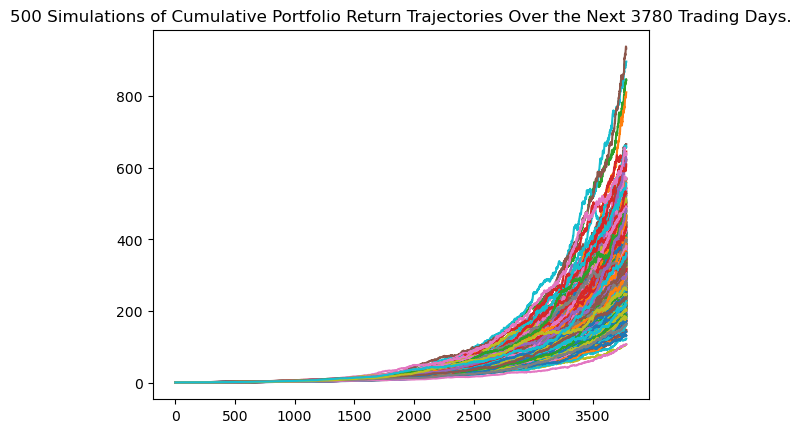

In [26]:
# Define weights and historical returns

weights = [0.11, 0.05, 0.18, 0.01, 0.17, 0.09, 0.09, 0.01, 0.04, 0.2, 0.03, 0.01, 0.01]

# historical_returns = {
#     "ABBV": 12.13, "AMZN": 29.18, "COST": 20.57, "CVX": 2.51, "HD": 16.11,
#     "JNJ": 4.04, "LLY": 28.60, "MRK": 9.32, "PG": 7.19, "UNH": 20.42,
#     "V": 17.69, "^TNX": 5.63, "^TYX": 3.16, "WELL": 4.07, "O": 2.63, "CCI": 2.35
# }

# Initialize the PortfolioSimulator
sim_returns2 = PortfolioSimulator(
    portfolio_data=all_assets_df,
    annual_returns=historical_returns,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*15  # Simulate for 2 years (approx. 252 trading days per year)
)

# Display the first few rows of the portfolio data
display(sim_returns2.portfolio_data)
display(sim_returns2.daily_log_returns)

# Run the simulation
cumulative_returns = sim_returns2.calc_cumulative_return()

# Plot the simulation results
sim_returns2.plot_simulation()

# # Plot the distribution of final cumulative returns
# sim_returns2.plot_distribution()

# Summarize the cumulative return statistics
summary = sim_returns2.summarize_cumulative_return()
print(summary)

In [27]:
# Set initial investment
initial_investment = 45000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * summary[9],2) 
port_low_return = round(initial_investment * summary[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $45000 in the portfolio over the next 5 years will end within in the range of $7290881.33 and $25634930.51


In [28]:
initial_investment = 45000
lower_estimate = 7290881.33 
upper_estimate = 25634930.51

years = 15

lower_annual_return = (lower_estimate / initial_investment) ** (1 / years) - 1
upper_annual_return = (upper_estimate / initial_investment) ** (1 / years) - 1

print(f"Lower Implied Annual Return: {lower_annual_return * 100:.2f}%")
print(f"Upper Implied Annual Return: {upper_annual_return * 100:.2f}%")

Lower Implied Annual Return: 40.38%
Upper Implied Annual Return: 52.65%


### Conservative Portfolio Test

In [29]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_LR import PortfolioSimulator

# List of assets to fetch data for
asset_list = ['ABBV', 'COST', 'JPM', 'LLY', 'META', 'MRK', 'NVDA', 'PG', 'XOM', '^TNX', '^TYX', 'WELL', 'O', 'CCI']

# Define the start and end dates for fetching the data (2 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Calculate historical annual returns
historical_returns = {}
for asset in asset_list:
    close_prices = all_assets_df[asset]['close']
    daily_returns = close_prices.pct_change().dropna()
    avg_daily_return = daily_returns.mean()
    annual_return = ((1 + avg_daily_return) ** 252 - 1) * 100  # Convert to percentage
    historical_returns[asset] = annual_return

print("Historical Annual Returns:", historical_returns)

Fetching data for ABBV...
Fetching data for COST...
Fetching data for JPM...
Fetching data for LLY...
Fetching data for META...
Fetching data for MRK...
Fetching data for NVDA...
Fetching data for PG...
Fetching data for XOM...
Fetching data for ^TNX...
Fetching data for ^TYX...
Fetching data for WELL...
Fetching data for O...
Fetching data for CCI...


ABBV                                                  \
                  open        high         low       close   adj close   
2022-06-09  149.720001  150.520004  145.300003  145.429993  134.538757   
2022-06-10  144.339996  144.630005  142.149994  143.199997  132.475784   
2022-06-13  140.860001  142.070007  138.779999  139.419998  128.978867   
2022-06-14  139.440002  140.660004  136.320007  137.619995  127.313667   
2022-06-15  136.570007  139.089996  136.229996  138.089996  127.748489   
...                ...         ...         ...         ...         ...   
2024-06-03  160.000000  163.190002  158.830002  160.190002  160.190002   
2024-06-04  160.190002  162.809998  159.770004  162.139999  162.139999   
2024-06-05  162.899994  165.979996  162.160004  165.440002  165.440002   
2024-06-06  165.490005  168.880005  164.350006  168.570007  168.570007   
2024-06-07  169.000000  170.339996  167.789993  169.419998  169.419998   

                                    COST                          ...  \
               volume ticker        open        high         low  ...   
2022-06-09  5642900.0   ABBV  467.339996  484.239990  467.149994  ...   
2022-06-10  5464700.0   ABBV  465.000000  468.190002  457.760010  ...   
2022-06-13  5997000.0   ABBV  450.000000  458.640015  448.899994  ...   
2022-06-14  5861800.0   ABBV  452.250000  458.760010  450.279999  ...   
2022-06-15  5981800.0   ABBV  458.500000  464.359985  451.390015  ...   
...               ...    ...         ...         ...         ...  ...   
2024-06-03  4467800.0   ABBV  811.000000  827.909973  807.130005  ...   
2024-06-04  4215500.0   ABBV  814.979980  828.010010  813.039978  ...   
2024-06-05  5100500.0   ABBV  830.909973  834.390015  821.679993  ...   
2024-06-06  5186700.0   ABBV  835.419983  849.090027  834.320007  ...   
2024-06-07  3781700.0   ABBV  846.679993  850.380005  842.289978  ...   

                    O                           CCI                          \
            adj close     volume ticker        open        high         low   
2022-06-09  59.740982  4325300.0      O  183.500000  185.830002  179.369995   
2022-06-10  59.452549  4513600.0      O  177.080002  177.610001  172.520004   
2022-06-13  56.973850  5406100.0      O  169.160004  171.699997  165.250000   
2022-06-14  56.595295  4541300.0      O  164.500000  165.110001  157.190002   
2022-06-15  58.406998  4884500.0      O  160.350006  163.100006  157.800003   
...               ...        ...    ...         ...         ...         ...   
2024-06-03  53.310001  4398700.0      O  102.989998  104.010002  102.449997   
2024-06-04  54.430000  5815900.0      O  103.019997  104.230003  102.410004   
2024-06-05  54.029999  4729300.0      O  103.260002  103.959999  102.160004   
2024-06-06  54.259998  3350700.0      O  101.870003  102.320000  101.279999   
2024-06-07  53.320000  3962700.0      O  100.000000  101.000000   99.260002   

                                                      
                 close   adj close     volume ticker  
2022-06-09  179.630005  162.834045  1381400.0    CCI  
2022-06-10  172.649994  156.506699  1879100.0    CCI  
2022-06-13  166.039993  150.514755  1733800.0    CCI  
2022-06-14  157.919998  144.432709  3224600.0    CCI  
2022-06-15  160.250000  146.563705  2949700.0    CCI  
...                ...         ...        ...    ...  
2024-06-03  103.110001  103.110001  2891900.0    CCI  
2024-06-04  103.620003  103.620003  2213300.0    CCI  
2024-06-05  102.379997  102.379997  1961100.0    CCI  
2024-06-06  101.639999  101.639999  1940300.0    CCI  
2024-06-07  100.620003  100.620003  2324800.0    CCI  

[502 rows x 98 columns]

Historical Annual Returns: {'ABBV': 10.311036672320517, 'COST': 37.31889294813335, 'JPM': 29.833207077119273, 'LLY': 74.40970745710072, 'META': 83.99196645111888, 'MRK': 24.219193161521368, 'NVDA': 197.96939965679496, 'PG': 9.82477355234197, 'XOM': 8.92101379511896, '^TNX': 27.06442460676808, '^TYX': 23.808435700953588, 'WELL': 15.411501125384476, 'O': -8.488928876478885, 'CCI': -22.261877427706843}


ABBV                                                  \
                  open        high         low       close   adj close   
2022-06-09  149.720001  150.520004  145.300003  145.429993  134.538757   
2022-06-10  144.339996  144.630005  142.149994  143.199997  132.475784   
2022-06-13  140.860001  142.070007  138.779999  139.419998  128.978867   
2022-06-14  139.440002  140.660004  136.320007  137.619995  127.313667   
2022-06-15  136.570007  139.089996  136.229996  138.089996  127.748489   
...                ...         ...         ...         ...         ...   
2024-06-03  160.000000  163.190002  158.830002  160.190002  160.190002   
2024-06-04  160.190002  162.809998  159.770004  162.139999  162.139999   
2024-06-05  162.899994  165.979996  162.160004  165.440002  165.440002   
2024-06-06  165.490005  168.880005  164.350006  168.570007  168.570007   
2024-06-07  169.000000  170.339996  167.789993  169.419998  169.419998   

                                               COST              ...      O  \
               volume ticker log_return        open        high  ... ticker   
2022-06-09  5642900.0   ABBV        NaN  467.339996  484.239990  ...      O   
2022-06-10  5464700.0   ABBV  -0.015453  465.000000  468.190002  ...      O   
2022-06-13  5997000.0   ABBV  -0.026751  450.000000  458.640015  ...      O   
2022-06-14  5861800.0   ABBV  -0.012995  452.250000  458.760010  ...      O   
2022-06-15  5981800.0   ABBV   0.003409  458.500000  464.359985  ...      O   
...               ...    ...        ...         ...         ...  ...    ...   
2024-06-03  4467800.0   ABBV  -0.006533  811.000000  827.909973  ...      O   
2024-06-04  4215500.0   ABBV   0.012100  814.979980  828.010010  ...      O   
2024-06-05  5100500.0   ABBV   0.020148  830.909973  834.390015  ...      O   
2024-06-06  5186700.0   ABBV   0.018743  835.419983  849.090027  ...      O   
2024-06-07  3781700.0   ABBV   0.005030  846.679993  850.380005  ...      O   

                              CCI                                      \
           log_return        open        high         low       close   
2022-06-09        NaN  183.500000  185.830002  179.369995  179.630005   
2022-06-10  -0.004840  177.080002  177.610001  172.520004  172.649994   
2022-06-13  -0.035551  169.160004  171.699997  165.250000  166.039993   
2022-06-14  -0.006667  164.500000  165.110001  157.190002  157.919998   
2022-06-15   0.031510  160.350006  163.100006  157.800003  160.250000   
...               ...         ...         ...         ...         ...   
2024-06-03   0.004701  102.989998  104.010002  102.449997  103.110001   
2024-06-04   0.020792  103.019997  104.230003  102.410004  103.620003   
2024-06-05  -0.007376  103.260002  103.959999  102.160004  102.379997   
2024-06-06   0.004248  101.870003  102.320000  101.279999  101.639999   
2024-06-07  -0.017476  100.000000  101.000000   99.260002  100.620003   

                                                     
             adj close     volume ticker log_return  
2022-06-09  162.834045  1381400.0    CCI        NaN  
2022-06-10  156.506699  1879100.0    CCI  -0.039633  
2022-06-13  150.514755  1733800.0    CCI  -0.039038  
2022-06-14  144.432709  3224600.0    CCI  -0.050140  
2022-06-15  146.563705  2949700.0    CCI   0.014647  
...                ...        ...    ...        ...  
2024-06-03  103.110001  2891900.0    CCI   0.005934  
2024-06-04  103.620003  2213300.0    CCI   0.004934  
2024-06-05  102.379997  1961100.0    CCI  -0.012039  
2024-06-06  101.639999  1940300.0    CCI  -0.007254  
2024-06-07  100.620003  2324800.0    CCI  -0.010086  

[502 rows x 112 columns]

array([ 0.00038942,  0.00125848,  0.00103603,  0.00220729,  0.00241953,
        0.00086063,  0.00433262,  0.00037189,  0.0003391 ,  0.00095049,
        0.00084748,  0.00056879, -0.00035202, -0.0009993 ])

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:97: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean            159.240916
std              53.513465
min              62.352837
25%             119.874292
50%             149.854371
75%             192.847016
max             414.968332
95% CI Lower     82.842142
95% CI Upper    281.796875
Name: 3780, dtype: float64


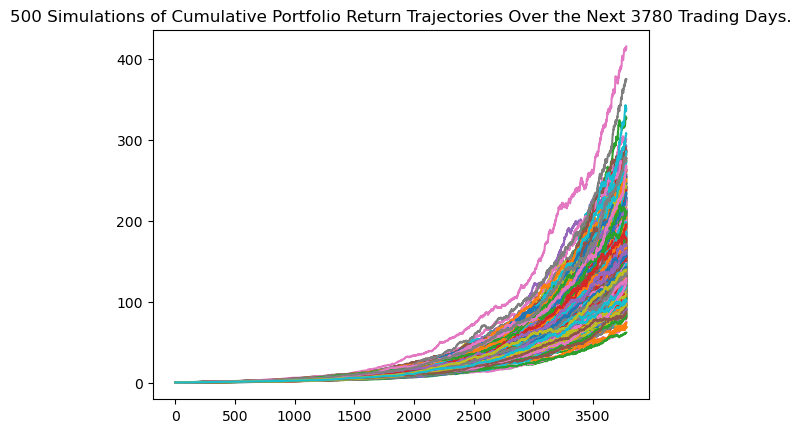

In [36]:
# Define weights and historical returns

weights = [0.01, 0.1, 0.04, 0.14, 0.01, 0.17, 0.07, 0.13, 0.02, 0.04, 0.2, 0.03, 0.03, 0.01]

# historical_returns = {
#     "ABBV": 12.13, "AMZN": 29.18, "COST": 20.57, "CVX": 2.51, "HD": 16.11,
#     "JNJ": 4.04, "LLY": 28.60, "MRK": 9.32, "PG": 7.19, "UNH": 20.42,
#     "V": 17.69, "^TNX": 5.63, "^TYX": 3.16, "WELL": 4.07, "O": 2.63, "CCI": 2.35
# }

# Initialize the PortfolioSimulator
sim_returns2 = PortfolioSimulator(
    portfolio_data=all_assets_df,
    annual_returns=historical_returns,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*15  # Simulate for 2 years (approx. 252 trading days per year)
)

# Display the first few rows of the portfolio data
display(sim_returns2.portfolio_data)
display(sim_returns2.daily_log_returns)

# Run the simulation
cumulative_returns = sim_returns2.calc_cumulative_return()

# Plot the simulation results
sim_returns2.plot_simulation()

# # Plot the distribution of final cumulative returns
# sim_returns2.plot_distribution()

# Summarize the cumulative return statistics
summary = sim_returns2.summarize_cumulative_return()
print(summary)

In [37]:
# Set initial investment
initial_investment = 31000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * summary[9],2) 
port_low_return = round(initial_investment * summary[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $31000 in the portfolio over the next 5 years will end within in the range of $2568106.4 and $8735703.13


In [38]:
initial_investment = 31000
lower_estimate = 2568106.4   
upper_estimate = 8735703.13

years = 15

lower_annual_return = (lower_estimate / initial_investment) ** (1 / years) - 1
upper_annual_return = (upper_estimate / initial_investment) ** (1 / years) - 1

print(f"Lower Implied Annual Return: {lower_annual_return * 100:.2f}%")
print(f"Upper Implied Annual Return: {upper_annual_return * 100:.2f}%")

Lower Implied Annual Return: 34.24%
Upper Implied Annual Return: 45.66%
